# Capstone Project - The Battle of Neighborhoods (Week 2) Final Report

Table of Contents 
  Business Problem
 - Data 
 - Methodology
 - Results
 - Discussion
 - Conclusion

# Business Problem 
Being a stakeholder, if you want to open a grocery store in any city, your main concern is always about best location and also you will prefer a safe location so that you don’t have to suffer a loss.
In this final project week 1, we aim to find a secure place or location to open a business in Vancouver city of British Columbia, Canada. Significantly, this information will be aimed for stakeholders or business person who is much interested in opening any retail store like Grocery store in the Vancouver City of British Columbia, Canada.
In this chore, first thing would be find the safest borough by analyzing the data for crime for opening a grocery store and then filtering the neighborhood where the store is not between the most usual venues and yet it is very close in proximity to the city.
For this purpose, we will use data science tools and packages to analyze the data and find out the secure borough and try to explore its neighborhood. Along with this, we will also try to find ten common venues for each neighborhood and see which is the most suitable neighborhood where grocery store can be opened.


# Data 
As per the problem statement, the components that will be helpful for our decision making are:
-	Find safest borough as per crime data in Vancouver city
-	Find out the common venues
-	Selecting the best neighborhood 
For this purpose, geographical location of Vancouver city will be used to find the neighborhoods around the borough which is safest and also near to city and in the end, will cluster neighborhoods.
Below is the data which we will be using for our business problem:
-	Section 1: Will use Kraggle data set of Vancouver Crimes from 2003-2019 which has data related to type of crime, year, month and time.
-	Section 2: We will use Wikipedia to find the official boroughs in Vancouver city. This borough information will be utilized to map the data and neighborhood will be assigned to its borough.
-	Section 3: We will create new dataset which will have all these neighborhoods, borough, crime data and the geographical location of neighborhood. This location we can get from Geocoder to explore the neighborhood and can be used to plot on map. We can analyze using these data.
-	Section 4: We will create new dataset of neighborhoods, borough and common venues. We will use Four Square API for exploring the venues and then we will cluster the neighborhoods and plot in on map using folium.



## Section 1
### Importing all libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import lxml.html as lxml
import bs4 as bs
import urllib.request

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
! pip install opencage
from opencage.geocoder import OpenCageGeocode
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries are imported')

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200801201915-0000
KERNEL_ID = c4482f8b-eff2-47e3-92ba-2b5e411182a7
    100% |████████████████████████████████| 61kB 2.3MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 2.7MB 1.8MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 1.6MB/s eta 0:00:01
    100% |████████████████████████████████| 163kB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 3.8MB/s eta 0:00:01
    100% |████████████████████████████████| 409kB 4.0MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 4.4MB/s eta 0:00:01
tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which

### We will read the Vancouver city crime data from Kraggle 
#### URL for Dataset : https://www.kaggle.com/agilesifaka/vancouver-crime-report/version/2

In [2]:
df_crime = pd.read_csv('https://raw.githubusercontent.com/Ameetkumaru/Coursera_Capstone/master/Crime%20Records_2019.csv', index_col=None)

#Dropping X,Y which represents Lat, Lng data as Coordinates, the data seems to be corrupt
df_crime.drop(['Unnamed: 0','MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)

#vnc_crime_df.columns

df_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District


In [3]:
# Change the column name
df_crime.columns = ['Type', 'Year','Month','Day','Hour','Neighbourhood']
df_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District


In [4]:
# Count of crimes in neighborhood
df_crime['Neighbourhood'].value_counts()

Central Business District    10857
West End                      3031
Mount Pleasant                2396
Strathcona                    1987
Kitsilano                     1802
Fairview                      1795
Renfrew-Collingwood           1762
Grandview-Woodland            1761
Kensington-Cedar Cottage      1391
Hastings-Sunrise              1270
Sunset                         967
Riley Park                     866
Marpole                        828
Victoria-Fraserview            600
Killarney                      565
Oakridge                       499
Dunbar-Southlands              474
Kerrisdale                     417
Shaughnessy                    414
West Point Grey                372
Arbutus Ridge                  311
South Cambie                   292
Stanley Park                   154
Musqueam                        17
Name: Neighbourhood, dtype: int64

## Section 2

In [5]:
# define the dataframe columns
colnames = ['Neighbourhood', 'Borough'] 

# instantiate the dataframe
df_neighborhood = pd.DataFrame(columns=colnames)

df_neighborhood['Neighbourhood'] = df_crime['Neighbourhood'].unique()

dict_neighborhood = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(dict_neighborhood, df_neighborhood['Neighbourhood']):
  df_neighborhood.loc[df_neighborhood.Neighbourhood == row, 'Borough'] = dict_neighborhood.get(row)

df_neighborhood.dropna(inplace=True)

print("Total Neighbourhood Count",len(df_neighborhood['Neighbourhood']),"Borough Count",len(df_neighborhood['Borough'].unique()))

df_neighborhood.head()

Total Neighbourhood Count 24 Borough Count 4


,Neighbourhood,Borough
0,West End,Central
1,Central Business District,Central
2,Hastings-Sunrise,East Side
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side


In [6]:
# Merge crime data and boroughs
df__boroughscrime = pd.merge(df_crime,df_neighborhood, on='Neighbourhood')

df__boroughscrime.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,Break and Enter Commercial,2018,3,2,6,West End,Central
1,Break and Enter Commercial,2018,6,16,18,West End,Central
2,Break and Enter Commercial,2018,12,12,0,West End,Central
3,Break and Enter Commercial,2018,3,2,3,West End,Central
4,Break and Enter Commercial,2018,3,17,11,West End,Central


In [7]:
df__boroughscrime.dropna(inplace=True)
df__boroughscrime['Borough'].value_counts()

Central            14042
East Side          12400
West Side           7204
South Vancouver     1182
Name: Borough, dtype: int64

# Methodology

### We will describe the methodology section in couple of parts:
#### Part 1 - Exploratory Data Analysis : In order to identify safest boroughs in Vancouver city , we will visualize the crimes and normalize the neighborhoods of boroughs respectively. We will find ten common venues in each neighborhood.

#### Part 2 - Modelling : To help the business person , we will cluster the neighborhood using K means clustering.We will use K-means clustering to provide the solution for this problem and help the decision making .

#### Part 1 : Exploratory Data Analysis 

In [8]:
df_crimecat = pd.pivot_table(df__boroughscrime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
df_crimecat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                787                               198   
East Side                              786                              1043   
South Vancouver                         49                               156   
West Side                              403                              1000   
All                                   2025                              2397   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2280        2489               6871              857   
East Side           2192        1674               4754              678   
South Vancouver      187          88                483               36   
West Side           1062         696               2838              588   
All                 5721        4947              14946             2159   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      245   
East Side                    605   
South Vancouver               71   
West Side                    225   
All                         1146   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        3       
All                                                             13       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        314    14042  
East Side                                                      660    12400  
South Vancouver                                                111     1182  
West Side                                                      389     7204  
All                                                           1474    34828

In [9]:
# Merge the columns

df_crimecat.reset_index(inplace = True)
df_crimecat.columns = df_crimecat.columns.map(''.join)
df_crimecat.rename(columns={'YearAll':'Total'}, inplace=True)
# To ignore bottom All in Borough
df_crimecat = df_crimecat.head(4)
df_crimecat

,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


In [10]:
df_crimeneigh = pd.pivot_table(df__boroughscrime,
                               values=['Year'],
                               index=['Neighbourhood'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
df_crimeneigh

Year  \
Type                      Break and Enter Commercial   
Neighbourhood                                          
Arbutus Ridge                                     12   
Central Business District                        551   
Dunbar-Southlands                                  8   
Fairview                                         138   
Grandview-Woodland                               148   
Hastings-Sunrise                                  48   
Kensington-Cedar Cottage                          62   
Kerrisdale                                        24   
Killarney                                         34   
Kitsilano                                        106   
Marpole                                           44   
Mount Pleasant                                   205   
Musqueam                                           0   
Oakridge                                          19   
Renfrew-Collingwood                               91   
Riley Park                                        35   
Shaughnessy                                       12   
South Cambie                                      22   
Stanley Park                                       6   
Strathcona                                       160   
Sunset                                            37   
Victoria-Fraserview                               15   
West End                                         230   
West Point Grey                                   18   
All                                             2025   

                                                                      \
Type                      Break and Enter Residential/Other Mischief   
Neighbourhood                                                          
Arbutus Ridge                                            78       49   
Central Business District                               124     1812   
Dunbar-Southlands                                       106       81   
Fairview                                                 73      233   
Grandview-Woodland                                      162      304   
Hastings-Sunrise                                        117      195   
Kensington-Cedar Cottage                                145      255   
Kerrisdale                                               97       49   
Killarney                                                72       90   
Kitsilano                                               165      320   
Marpole                                                 125      134   
Mount Pleasant                                          124      353   
Musqueam                                                  4        3   
Oakridge                                                123       64   
Renfrew-Collingwood                                     156      243   
Riley Park                                              122      140   
Shaughnessy                                             120       41   
South Cambie                                             42       41   
Stanley Park                                              2        8   
Strathcona                                              124      527   
Sunset                                                   93      175   
Victoria-Fraserview                                      80       94   
West End                                                 72      460   
West Point Grey                                          71       50   
All                                                    2397     5721   

                                                                           \
Type                      Other Theft Theft from Vehicle Theft of Bicycle   
Neighbourhood                                                               
Arbutus Ridge                      18                111               12   
Central Business District        2034               5301              640   
Dunbar-Southlands                  31                199               16   


In [11]:
df_crimeneigh.reset_index(inplace = True)
df_crimeneigh.columns = df_crimeneigh.columns.map(''.join)
df_crimeneigh.rename(columns={'YearAll':'Total'}, inplace=True)

df_crimeneigh.head()

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
2,Dunbar-Southlands,8,106,81,31,199,16,9,1,23,474
3,Fairview,138,73,233,297,692,245,55,0,62,1795
4,Grandview-Woodland,148,162,304,215,634,110,123,0,65,1761


In [12]:
# describe the dataframe
df_crimecat.describe()

,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,506.250000,599.250000,1430.25000,1236.750000,3736.500000,539.750000,286.500000,3.250000,368.500000,8707.000000
std,354.409721,488.189427,997.26572,1060.087221,2723.536977,353.955153,226.117226,3.304038,227.060198,5801.870618
min,49.000000,156.000000,187.00000,88.000000,483.000000,36.000000,71.000000,1.000000,111.000000,1182.000000
25%,314.500000,187.500000,843.25000,544.000000,2249.250000,450.000000,186.500000,1.000000,263.250000,5698.500000
50%,594.500000,599.000000,1627.00000,1185.000000,3796.000000,633.000000,235.000000,2.000000,351.500000,9802.000000
75%,786.250000,1010.750000,2214.00000,1877.750000,5283.250000,722.750000,335.000000,4.250000,456.750000,12810.500000
max,787.000000,1043.000000,2280.00000,2489.000000,6871.000000,857.000000,605.000000,8.000000,660.000000,14042.000000


In [13]:
#Sort the data
df_crimeneigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

crime_neigh_top5 = df_crimeneigh.iloc[1:6]
crime_neigh_top5

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
22,West End,230,72,460,455,1461,203,77,1,72,3031
11,Mount Pleasant,205,124,353,493,822,232,67,0,100,2396
19,Strathcona,160,124,527,81,821,108,76,2,88,1987
9,Kitsilano,106,165,320,154,755,189,51,1,61,1802


#### Visualize the data

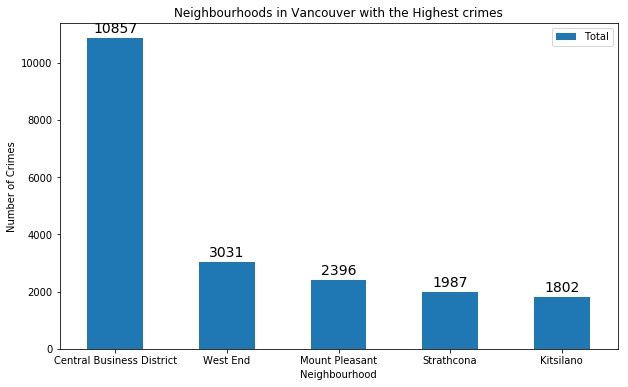

In [14]:
# 5 Neighborhoods with highest crime
df_perneigh = crime_neigh_top5[['Neighbourhood','Total']]

df_perneigh.set_index('Neighbourhood',inplace = True)

ax = df_perneigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [15]:
# Five neighborhood with lowest crime
df_crimeneighlow = df_crimeneigh.tail(5)
df_crimeneighlow

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
23,West Point Grey,18,71,50,11,157,32,11,0,22,372
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
17,South Cambie,22,42,41,38,111,19,8,0,11,292
18,Stanley Park,6,2,8,0,109,14,3,0,12,154
12,Musqueam,0,4,3,0,4,2,2,0,2,17


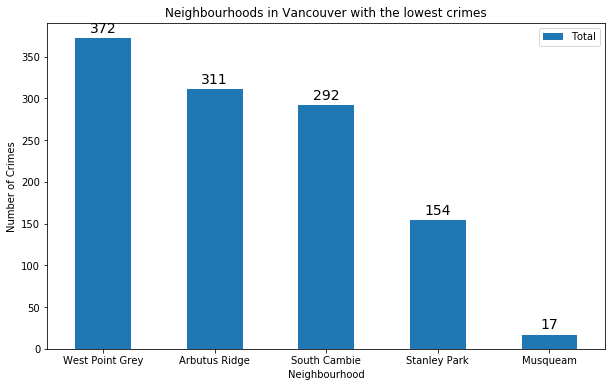

In [16]:
df_perneigh = df_crimeneighlow[['Neighbourhood','Total']]

df_perneigh.set_index('Neighbourhood',inplace = True)

ax = df_perneigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

In [17]:
# Borough with highest crime
df_crimecat = pd.pivot_table(df__boroughscrime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
df_crimecat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                787                               198   
East Side                              786                              1043   
South Vancouver                         49                               156   
West Side                              403                              1000   
All                                   2025                              2397   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2280        2489               6871              857   
East Side           2192        1674               4754              678   
South Vancouver      187          88                483               36   
West Side           1062         696               2838              588   
All                 5721        4947              14946             2159   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      245   
East Side                    605   
South Vancouver               71   
West Side                    225   
All                         1146   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        3       
All                                                             13       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        314    14042  
East Side                                                      660    12400  
South Vancouver                                                111     1182  
West Side                                                      389     7204  
All                                                           1474    34828

In [18]:
df_crimecat.reset_index(inplace = True)
df_crimecat.columns = df_crimecat.columns.map(''.join)
df_crimecat.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial' : 'Break and Enter Commercial',
                              'YearBreak and Enter Residential/Other' : 'Break and Enter Residential',
                              'YearMischief' : 'Mischief',
                              'YearOther Theft' : 'Other',
                              'YearTheft from Vehicle' : 'Theft from Vehicle',
                              'YearTheft of Bicycle' : 'Theft of Bicycle',
                              'YearTheft of Vehicle' : 'Theft of Vehicle',
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)' : 'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)' : 'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)
# To ignore bottom All in Borough
df_crimecat = df_crimecat.head(4)
df_crimecat

,Borough,Break and Enter Commercial,Break and Enter Residential,Mischief,Other,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


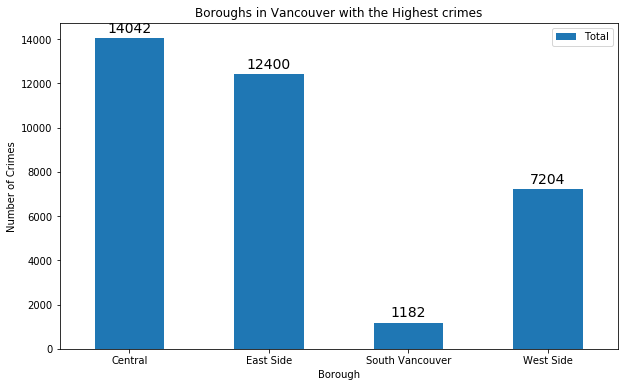

In [19]:
df_perborough = df_crimecat[['Borough','Total']]

df_perborough.set_index('Borough',inplace = True)

ax = df_perborough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Boroughs in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

### Based on above analysis , South Vancouver has lowest crimes
### Since South Vancouver has less neighborhood , we would choose next borough with lowest crime 'West side'

### Different types of crimes in West side

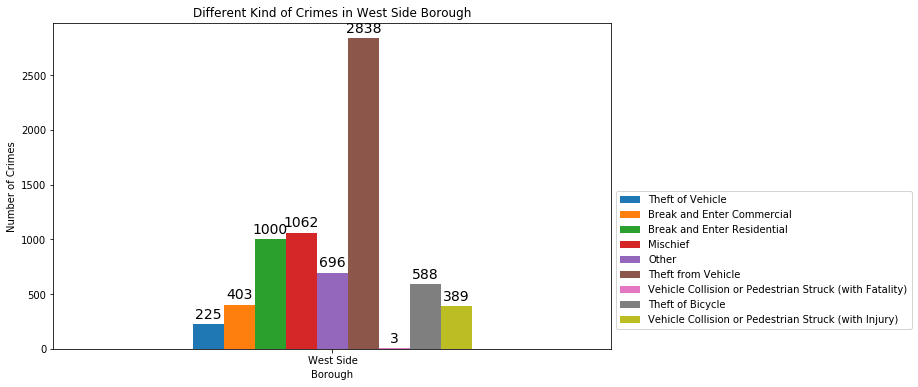

In [20]:
 df_wsdf = df_crimecat[df_crimecat['Borough'] == 'West Side']

 df_wsdf = df_wsdf.sort_values(['Total'], ascending = True, axis = 0)

df_ws = df_wsdf[['Borough','Theft of Vehicle', 'Break and Enter Commercial','Break and Enter Residential','Mischief','Other',
                 'Theft from Vehicle','Vehicle Collision or Pedestrian Struck (with Fatality)','Theft of Bicycle',
                 'Vehicle Collision or Pedestrian Struck (with Injury)']]


df_ws.set_index('Borough',inplace = True)

ax = df_ws.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Different Kind of Crimes in West Side Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

# Section 3

In [21]:
df_wsneigh = df__boroughscrime

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
df_wsneigh = df_wsneigh[df_wsneigh['Borough'] == 'West Side']
df_wsneigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Side Borough', len(df_wsneigh['Neighbourhood'].unique()))

df_wsneigh['Neighbourhood'].unique()

Number of Neighbourhoods in West Side Borough 10


array(['Shaughnessy', 'Fairview', 'Oakridge', 'Marpole', 'Kitsilano',
       'Kerrisdale', 'West Point Grey', 'Arbutus Ridge', 'South Cambie',
       'Dunbar-Southlands'], dtype=object)

In [22]:
# Will use opencagegeocode to get the location
Latitude = []
Longitude = []
Borough = []
Neighbourhood = df_wsneigh['Neighbourhood'].unique()

key = 'cb7ecd96b2b744d18c303c3e0e052331'
geocoder = OpenCageGeocode(key)


for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude)

#print('The geograpical coordinate of Vancouver City are {}, {}.'.format(latitude, longitude))

[49.2518626, 49.2641128, 49.2308288, 49.2092233, 49.2694099, 49.2346728, 49.2644843, 49.2409677, 49.2466847, 49.2534601] [-123.1380226, -123.1268352, -123.1311342, -123.1361495, -123.155267, -123.1553893, -123.1854326, -123.1670008, -123.120915, -123.1850439]


In [23]:
df_wsneigdict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
df_wsneiggeo = pd.DataFrame(data=df_wsneigdict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

df_wsneiggeo

,Neighbourhood,Borough,Latitude,Longitude
0,Shaughnessy,West Side,49.251863,-123.138023
1,Fairview,West Side,49.264113,-123.126835
2,Oakridge,West Side,49.230829,-123.131134
3,Marpole,West Side,49.209223,-123.136150
4,Kitsilano,West Side,49.269410,-123.155267
5,Kerrisdale,West Side,49.234673,-123.155389
6,West Point Grey,West Side,49.264484,-123.185433
7,Arbutus Ridge,West Side,49.240968,-123.167001
8,South Cambie,West Side,49.246685,-123.120915
9,Dunbar-Southlands,West Side,49.253460,-123.185044


In [24]:
# Location of Vancouver city to plot on map
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


In [25]:
van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_wsneiggeo['Latitude'], df_wsneiggeo['Longitude'], df_wsneiggeo['Borough'], df_wsneiggeo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  
    
van_map

# Section 4

In [26]:
#Four Square Credentials

CLIENT_ID = 'A5BQHTXZSBP5DP1C0O2CIDGWDLJY424AGSVCDFEMX0V5SV0D' # your Foursquare ID
CLIENT_SECRET = 'ETLNF3PPFURPNXG1UFYCDYSHMBYGUVINSHN3YTWTUEDAK24O' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A5BQHTXZSBP5DP1C0O2CIDGWDLJY424AGSVCDFEMX0V5SV0D
CLIENT_SECRET:ETLNF3PPFURPNXG1UFYCDYSHMBYGUVINSHN3YTWTUEDAK24O


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
df_wsvenues = getNearbyVenues(names=df_wsneiggeo['Neighbourhood'],
                                   latitudes=df_wsneiggeo['Latitude'],
                                   longitudes=df_wsneiggeo['Longitude']
                                  )

Shaughnessy
Fairview
Oakridge
Marpole
Kitsilano
Kerrisdale
West Point Grey
Arbutus Ridge
South Cambie
Dunbar-Southlands


In [29]:
print(df_wsvenues.shape)
df_wsvenues.head()

(223, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Shaughnessy,49.251863,-123.138023,Bus Stop 50209 (10),Bus Stop
1,Shaughnessy,49.251863,-123.138023,Angus Park,Park
2,Shaughnessy,49.251863,-123.138023,Crepe & Cafe,French Restaurant
3,Fairview,49.264113,-123.126835,Gyu-Kaku Japanese BBQ,BBQ Joint
4,Fairview,49.264113,-123.126835,CRESCENT nail and spa,Nail Salon


In [30]:
df_wsvenues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Arbutus Ridge,5
Dunbar-Southlands,6
Fairview,26
Kerrisdale,40
Kitsilano,47
Marpole,30
Oakridge,7
Shaughnessy,3
South Cambie,15


In [31]:
print('There are {} uniques categories.'.format(len(df_wsvenues['Venue Category'].unique())))

There are 90 uniques categories.


### Modellling

In [32]:
# one hot encoding
df_onehot = pd.get_dummies(df_wsvenues[['Venue Category']], prefix="", prefix_sep="")

df_onehot['Neighbourhood'] = df_wsvenues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck,French Restaurant,Gas Station,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym Pool,Hobby Shop,Ice Cream Shop,Indian Restaurant,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Music Store,Nail Salon,New American Restaurant,Nightlife Spot,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Skating Rink,South American Restaurant,Spa,Sporting Goods Shop,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Wine Shop,Women's Store,Yoga Studio
0,Shaughnessy,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Shaughnessy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Shaughnessy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fairview,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fairview,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df_wsgrouped = df_onehot.groupby('Neighbourhood').mean().reset_index()
df_wsgrouped

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck,French Restaurant,Gas Station,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym Pool,Hobby Shop,Ice Cream Shop,Indian Restaurant,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Music Store,Nail Salon,New American Restaurant,Nightlife Spot,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Skating Rink,South American Restaurant,Spa,Sporting Goods Shop,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Wine Shop,Women's Store,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.200,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.166667,0.166667,0.000,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fairview,0.000000,0.076923,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.038462,0.000000,0.038462,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.038462,0.000,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.038462,0.000,0.000000,0.000000,0.038462,0.000000,0.0,0.000000,0.076923,0.000000,0.000,0.038462,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.038462,0.000000,0.038462,0.038462,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000
3,Kerrisdale,0.000000,0.025000,0.000000,0.025000,0.025000,0.000000,0.000000,0.000000,0.025,0.000000,0.025000,0.025,0.000000,0.000000,0.025000,0.000000,0.000000,0.075000,0.000000,0.100000,0.025000,0.000000,0.025000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025,0.025,0.025000,

In [34]:
# 5 most common venues
numtopvenues = 5

for hood in df_wsgrouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = df_wsgrouped[df_wsgrouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(numtopvenues))
    print('\n')

----Arbutus Ridge----
            venue  freq
0       Pet Store   0.2
1          Bakery   0.2
2  Nightlife Spot   0.2
3             Spa   0.2
4   Grocery Store   0.2


----Dunbar-Southlands----
                venue  freq
0    Sushi Restaurant  0.17
1        Liquor Store  0.17
2         Coffee Shop  0.17
3  Italian Restaurant  0.17
4   Indian Restaurant  0.17


----Fairview----
                 venue  freq
0          Coffee Shop  0.15
1     Asian Restaurant  0.08
2                 Park  0.08
3   Falafel Restaurant  0.04
4  Szechuan Restaurant  0.04


----Kerrisdale----
                venue  freq
0         Coffee Shop  0.10
1  Chinese Restaurant  0.08
2            Tea Room  0.05
3      Sandwich Place  0.05
4            Pharmacy  0.05


----Kitsilano----
                 venue  freq
0               Bakery  0.09
1  American Restaurant  0.04
2           Restaurant  0.04
3       Ice Cream Shop  0.04
4  Japanese Restaurant  0.04


----Marpole----
                   venue  freq
0       Sushi

In [35]:
def return_mostcommonvenues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
numtopvenues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(numtopvenues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
df_neighborhoodsvenuessorted = pd.DataFrame(columns=columns)
df_neighborhoodsvenuessorted['Neighbourhood'] = df_wsgrouped['Neighbourhood']

for ind in np.arange(df_wsgrouped.shape[0]):
    df_neighborhoodsvenuessorted.iloc[ind, 1:] = return_mostcommonvenues(df_wsgrouped.iloc[ind, :], numtopvenues)

df_neighborhoodsvenuessorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Bakery,Pet Store,Grocery Store,Nightlife Spot,Spa,Yoga Studio,Gastropub,Diner,Falafel Restaurant,Fast Food Restaurant
1,Dunbar-Southlands,Liquor Store,Sushi Restaurant,Coffee Shop,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck
2,Fairview,Coffee Shop,Asian Restaurant,Park,Chinese Restaurant,Malay Restaurant,Diner,Falafel Restaurant,Indian Restaurant,Restaurant,Camera Store
3,Kerrisdale,Coffee Shop,Chinese Restaurant,Sandwich Place,Sushi Restaurant,Pharmacy,Tea Room,Mediterranean Restaurant,Fast Food Restaurant,Noodle House,Dessert Shop
4,Kitsilano,Bakery,American Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Sushi Restaurant,Thai Restaurant


## Clusters 

In [37]:
k = 5

df_groupedclustering = df_wsgrouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_groupedclustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 0, 0, 0, 0, 3, 2, 0, 0], dtype=int32)

In [38]:
# add clustering labels
df_neighborhoodsvenuessorted.insert(0, 'Cluster Labels', kmeans.labels_)

van_merged = df_wsneiggeo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
van_merged = van_merged.join(df_neighborhoodsvenuessorted.set_index('Neighbourhood'), on='Neighbourhood')

van_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shaughnessy,West Side,49.251863,-123.138023,2,Park,French Restaurant,Bus Stop,Greek Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck,Gas Station,Gastropub
1,Fairview,West Side,49.264113,-123.126835,0,Coffee Shop,Asian Restaurant,Park,Chinese Restaurant,Malay Restaurant,Diner,Falafel Restaurant,Indian Restaurant,Restaurant,Camera Store
2,Oakridge,West Side,49.230829,-123.131134,3,Convenience Store,Israeli Restaurant,Vietnamese Restaurant,Sandwich Place,Fast Food Restaurant,Pharmacy,Sushi Restaurant,Gastropub,Dim Sum Restaurant,Diner
3,Marpole,West Side,49.209223,-123.136150,0,Pizza Place,Sushi Restaurant,Japanese Restaurant,Vietnamese Restaurant,Chinese Restaurant,Liquor Store,Dim Sum Restaurant,Plaza,Falafel Restaurant,Café
4,Kitsilano,West Side,49.269410,-123.155267,0,Bakery,American Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Sushi Restaurant,Thai Restaurant


In [39]:
# create map
map = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(van_merged['Latitude'], van_merged['Longitude'], van_merged['Neighbourhood'], van_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map)
       
map

## Analysis

In [40]:
# Cluster 1
van_merged.loc[van_merged['Cluster Labels'] == 0, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Side,Coffee Shop,Asian Restaurant,Park,Chinese Restaurant,Malay Restaurant,Diner,Falafel Restaurant,Indian Restaurant,Restaurant,Camera Store
3,West Side,Pizza Place,Sushi Restaurant,Japanese Restaurant,Vietnamese Restaurant,Chinese Restaurant,Liquor Store,Dim Sum Restaurant,Plaza,Falafel Restaurant,Café
4,West Side,Bakery,American Restaurant,Coffee Shop,Restaurant,Japanese Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Sushi Restaurant,Thai Restaurant
5,West Side,Coffee Shop,Chinese Restaurant,Sandwich Place,Sushi Restaurant,Pharmacy,Tea Room,Mediterranean Restaurant,Fast Food Restaurant,Noodle House,Dessert Shop
6,West Side,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Café,Pizza Place,Bakery,Vegetarian / Vegan Restaurant,Bookstore,Pub,Fast Food Restaurant
8,West Side,Coffee Shop,Light Rail Station,Grocery Store,Cantonese Restaurant,Park,Bus Stop,Gift Shop,Sushi Restaurant,Vietnamese Restaurant,Malay Restaurant


In [41]:
# Cluster 2
van_merged.loc[van_merged['Cluster Labels'] == 1, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,West Side,Bakery,Pet Store,Grocery Store,Nightlife Spot,Spa,Yoga Studio,Gastropub,Diner,Falafel Restaurant,Fast Food Restaurant


In [42]:
# Cluster 3
van_merged.loc[van_merged['Cluster Labels'] == 2, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Park,French Restaurant,Bus Stop,Greek Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck,Gas Station,Gastropub


In [43]:
# Cluster 4
van_merged.loc[van_merged['Cluster Labels'] == 3, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,West Side,Convenience Store,Israeli Restaurant,Vietnamese Restaurant,Sandwich Place,Fast Food Restaurant,Pharmacy,Sushi Restaurant,Gastropub,Dim Sum Restaurant,Diner


In [44]:
# Cluster 5
van_merged.loc[van_merged['Cluster Labels'] == 4, van_merged.columns[[1] + list(range(5, van_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,West Side,Liquor Store,Sushi Restaurant,Coffee Shop,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck


# Results and Discussion
The main goal of the business problem was to find some safest neighbourhood in Vancouver city of British Columbia for the stakeholder or business person so 
that they can open a grocery store in the neigborhood within the borough.
We were able to achieve this by using various methodology like using crime data of Vancouver city to identify safe borough.
After finding the safe borough , we wanted to select the best neighborhood where grocery store can be opened and which is not close
to other venues to each other.
We achieved this by grouping the nieghborhood into clusters and help business person to decide about venues and safety of neighborhood by showing them relevant data.



# Conclusion 
We explored the Vancouver city crime data with respect to all neighborhood and grouped them into their boroughs respectively.
This helped us to find the safest neighborhood and further we were able to find the neighborhood based on the common venues to filter out 
the best neighborhood  where grocery store can be opened by business person for end customers.